## 결합확률질량함수

주사위와 같이 1부터 6의 정수로 이루어진 카테고리값을 가질 수 있는 이산확률변수가 둘 이상인 경우 두 확률변수의 쌍에 대해 확률을 구할 수 있다.

주사위가 두개라고 가정하고 각각의 주사위가 확률변수 $X, Y$라고 하자.

그렇다면 각각의 확률적 특성은 확률질량함수 $Px(X), Py(Y)$로 나타낼 수 있다.

여기서 특정한 숫자 쌍이 나오는 경우를 **결합확률질량함수**로 표현하면 다음과 같다.

> $Pxy(x,y)$

만약 주사위 눈이 2, 6이 나왔다면 결합확률질량함수는 $Pxy(2,6)$이 된다.

그리고 그 확률은 $\dfrac{1}{6}$x$\dfrac{1}{6}$으로 $\dfrac{1}{36}$이다.

> $Pxy(2, 6) = \dfrac{1}{36}$

예제)

50명의 학생들의 X, Y 과목에 대한 성적이다.

행렬의 숫자는 해당 학점 조합을 받은 학생들의 수다.

In [1]:
grades = list('ABCDEF')
scores = pd.DataFrame(
    [[1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]], 
    columns=grades, index=grades)
scores.index.name = "Y"
scores.columns.name = "X"
scores

X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


위의 데이터프레임을 이용해 결합확률질량함수를 구할 수 있다.

In [3]:
scores.values.sum()

50

In [4]:
# 결합확률질량함수

pmf = scores / scores.values.sum()
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


결합확률질량함수의 히트맵 시각화

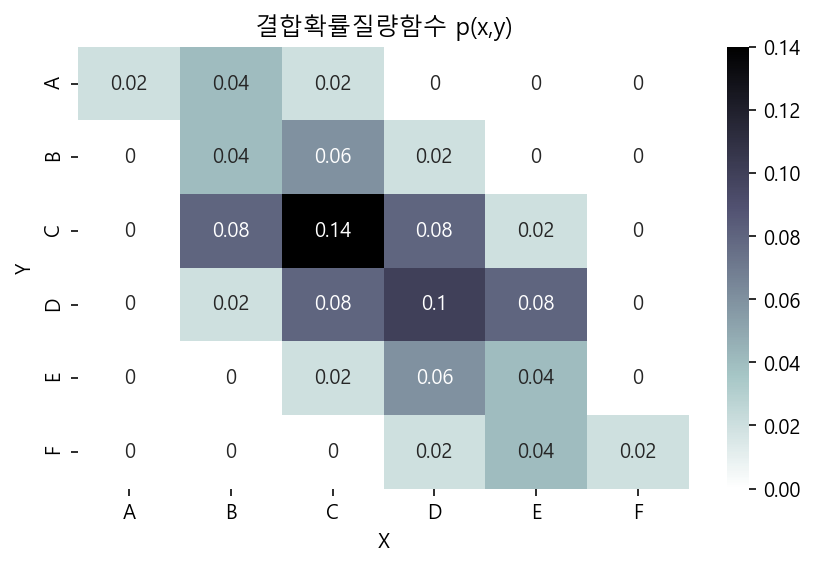

In [8]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
           xticklabels=list('ABCDEF'),
           yticklabels=list('ABCDEF'))
plt.title('결합확률질량함수 p(x,y)')
plt.tight_layout()
plt.show()

## 주변확률질량함수

**주변확률질량함수**는 두 확률변수 중 하나의 확률변숫값에 대해 확률분포를 표시한 함수이다.

즉, 다변수가 되기 이전의 단변수 확률질량함수이다.

\begin{align}
p_X(x) = \sum_{y_i} p_{XY}(x,y_i) 
\end{align}

\begin{align}
p_Y(y) = \sum_{y_i} p_{XY}(x_i,y) 
\end{align}

In [9]:
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [10]:
# px(x)

pmf.sum(axis=0)

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [11]:
# py(y)

pmf.sum(axis=1)

Y
A    0.08
B    0.12
C    0.32
D    0.28
E    0.12
F    0.08
dtype: float64

## 조건부확률질량함수

결합확률질량함수에서 하나의 확률변수가 특정한 값으로 고정되었다면 확률질량함수의 단면을 이용하여 다음과 같이 그릴 수 있다.

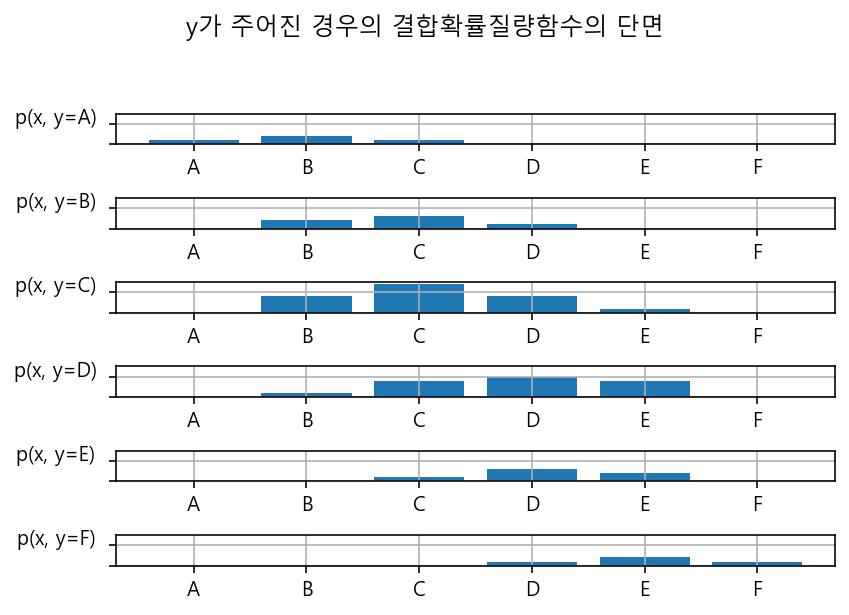

In [16]:
import string

x = np.arange(6)
for i, y in enumerate(string.ascii_uppercase[:6]):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.bar(x, pmf.iloc[i, :])
    plt.ylabel("p(x, y={})".format(y), rotation=0, labelpad=30)
    plt.ylim(0, 0.15)
    plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
    plt.grid()
plt.suptitle("y가 주어진 경우의 결합확률질량함수의 단면", y=1.05)
plt.tight_layout()
plt.show()

조건부확률질량함수는 다변수 확률변수 중 하나의 값이 고정된 상태이기에 상수가 된다.

따라서 나머지 확률변수에 대한 확률질량함수를 조건부확률질량함수라 한다.

$P_{X|Y}(X|Y) = \dfrac{P_{XY}(x,y)}{P_Y(y)} $

$y$가 조건으로 주어졌을 때 $\dfrac{1}{Py(y)}$을 곱하는 이유는 확률의 총합이 1이 아니기 때문에 이를 정규화 한 것이다.

In [18]:
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [17]:
# Y가 A일 때의 조건부확률질량함수

pmf.iloc[0, :]

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

In [19]:
pmf.iloc[0, :].sum()

0.08

In [26]:
pmf_marginal_y = pmf.sum(axis=1)

In [28]:
pmf_marginal_y

Y
A    0.08
B    0.12
C    0.32
D    0.28
E    0.12
F    0.08
dtype: float64

In [31]:
# Y의 주변확률질량함수로 normalize

np.sum(pmf.iloc[0, :]) / pmf_marginal_y[0]

1.0

In [34]:
# y = A일 때의 조건부확률질량함수

cond_y0 = pmf.iloc[0, :] / pmf_marginal_y[0]
cond_y0

X
A    0.25
B    0.50
C    0.25
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

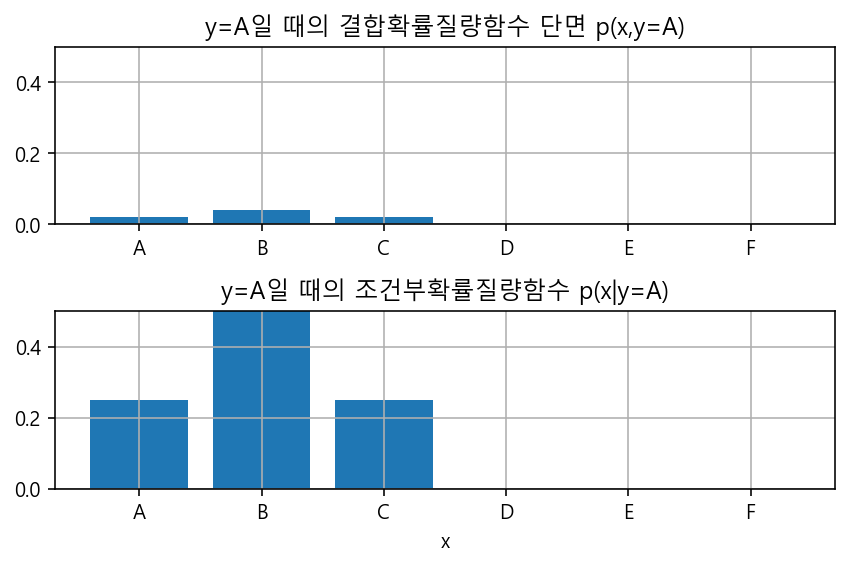

In [36]:
plt.subplot(211)
plt.bar(x, pmf.iloc[0, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 결합확률질량함수 단면 p(x,y=A)")
plt.grid()
plt.subplot(212)
plt.bar(x, cond_y0)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 조건부확률질량함수 p(x|y=A)")
plt.xlabel("x")
plt.tight_layout()
plt.grid()
plt.show()

## 결합확률밀도함수

확률밀도함수는 다음과 같이 PDF로 어떤 지점에서 확률 밀도가 가장 높은지를 표현할 수 있다.

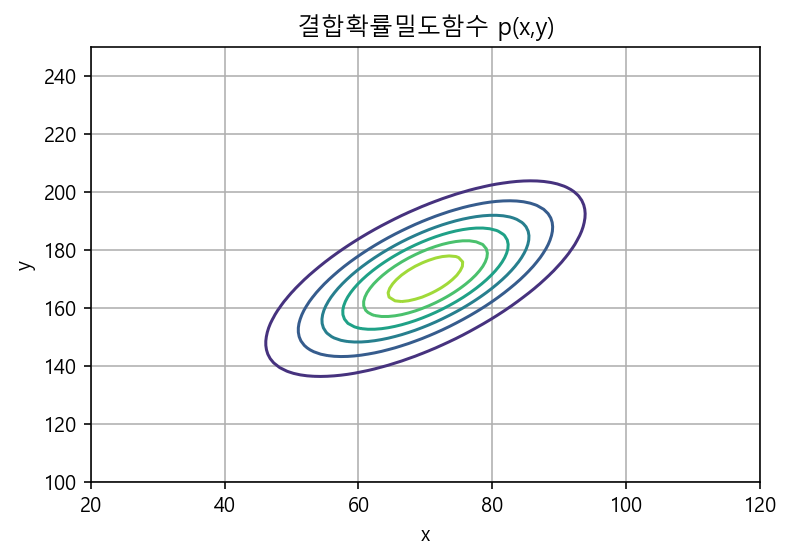

In [39]:
import scipy as sp

mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("결합확률밀도함수 p(x,y)")
plt.grid()
plt.show()

## 주변확률밀도함수

결합확률밀도함수를 특정한 하나의 변수에 대하 가중평균한 값이다.

결합확률밀도함수를 하나의 확률변수에 대해서 적분하여 구할 수 있다.

적분으로 인해 차원이 줄어들며 2차원의 경우 주변확률밀도함수는 1차원 함수가 된다.

\begin{align}
p_X(x) = \int_{-\infty}^{\infty} p_{XY}(x,y)dy 
\end{align}

\begin{align}
p_Y(y) = \int_{-\infty}^{\infty} p_{XY}(x,y)dx 
\end{align}

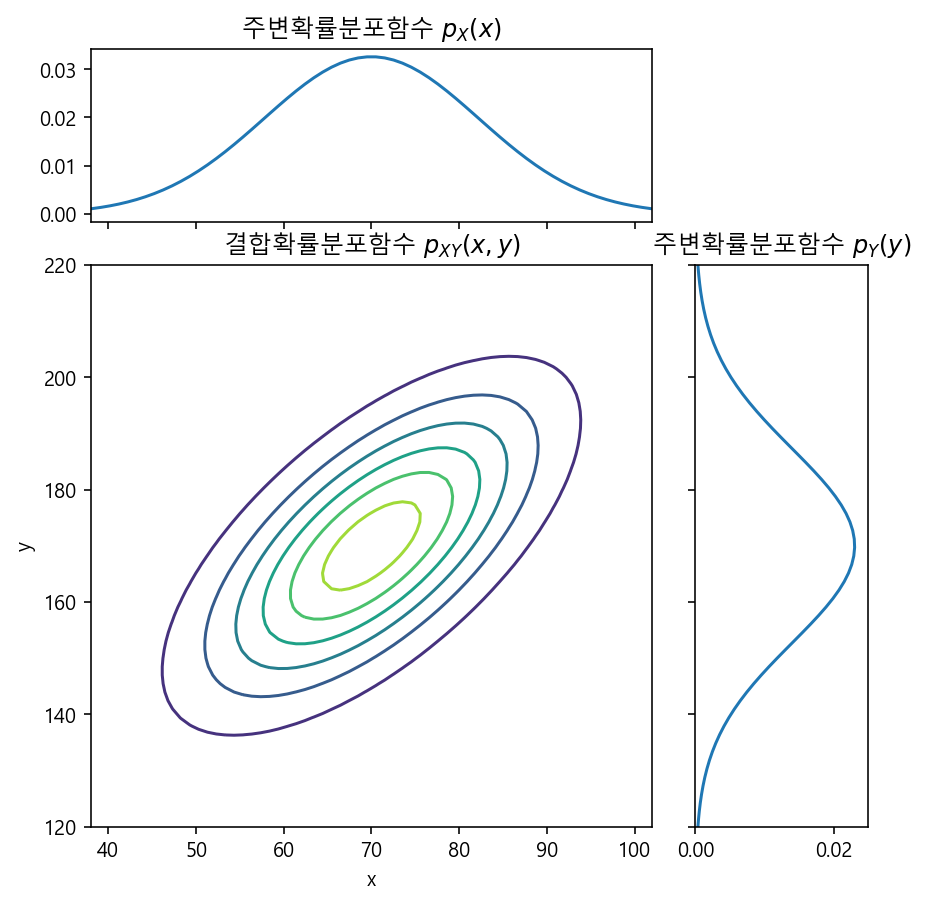

In [40]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6, 6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax1.set_title("결합확률분포함수 $p_{XY}(x, y)$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.plot(xx, fx)
ax2.set_title("주변확률분포함수 $p_X(x)$")

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)
plt.title("주변확률분포함수 $p_Y(y)$")

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)

plt.show()

## 조건부확률밀도함수

고정된 $y$에 대해 확률밀도함수의 단면을 구하면 아래와 같다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # Remove the CWD from sys.path while we load stuff.


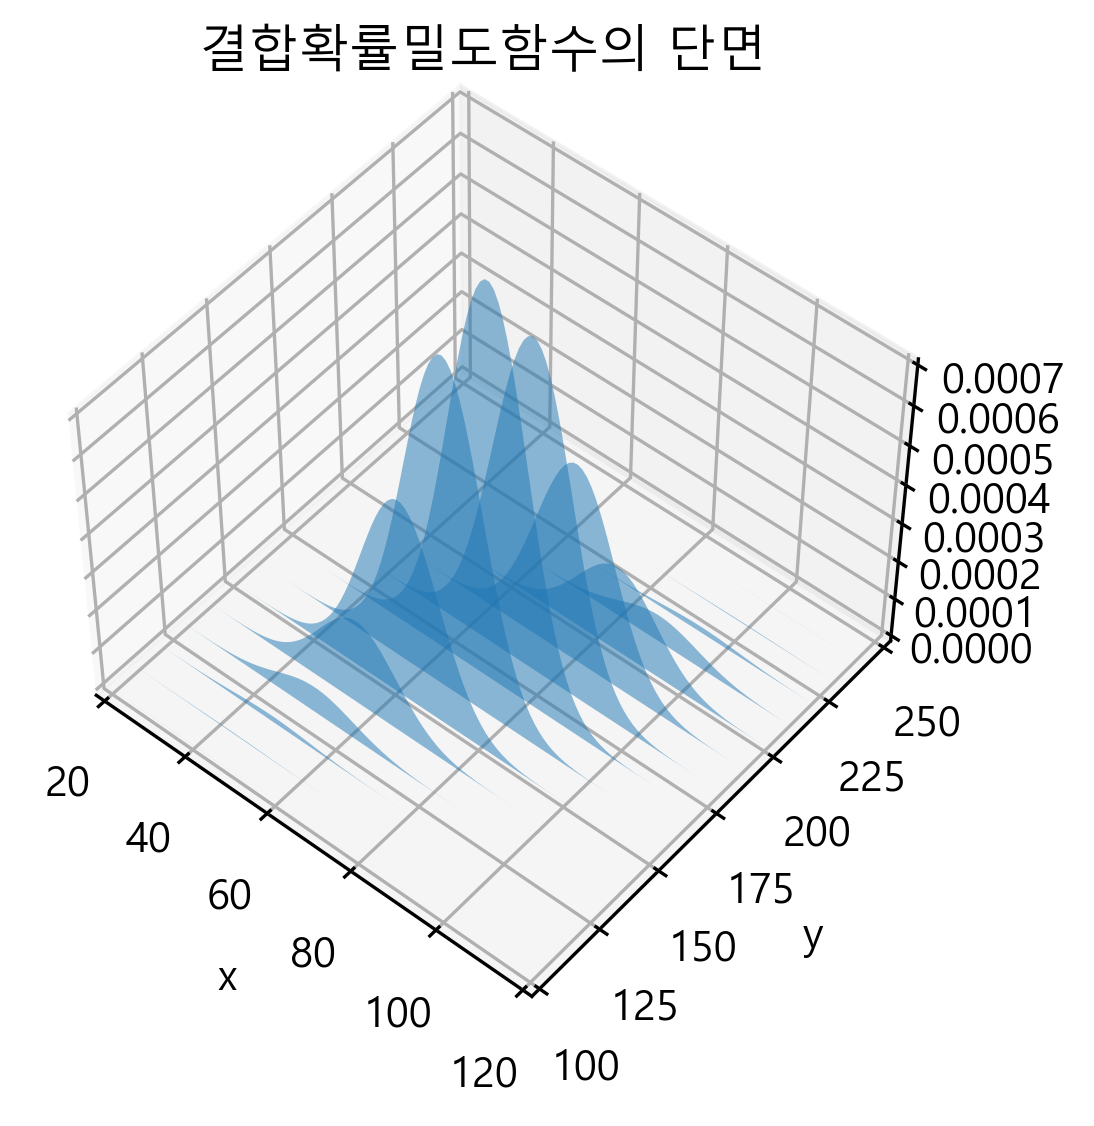

In [41]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.title("결합확률밀도함수의 단면")
plt.show()

단면 하나 하나의 부피가 주변확률밀도함수이다.

조건부는 자른 단면의 부피가 1이 되도록 재조정해준다.

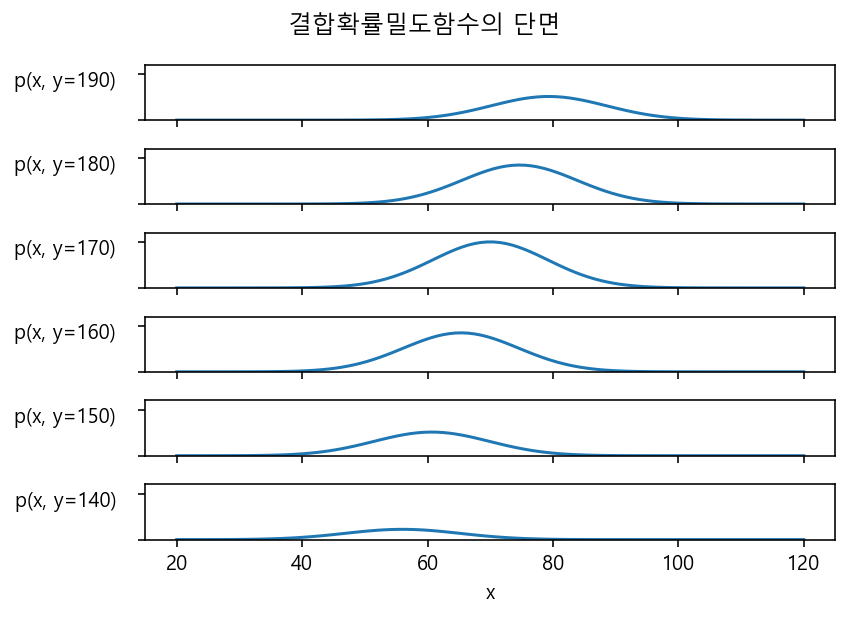

In [42]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.suptitle("결합확률밀도함수의 단면", y=1.05)
plt.show()

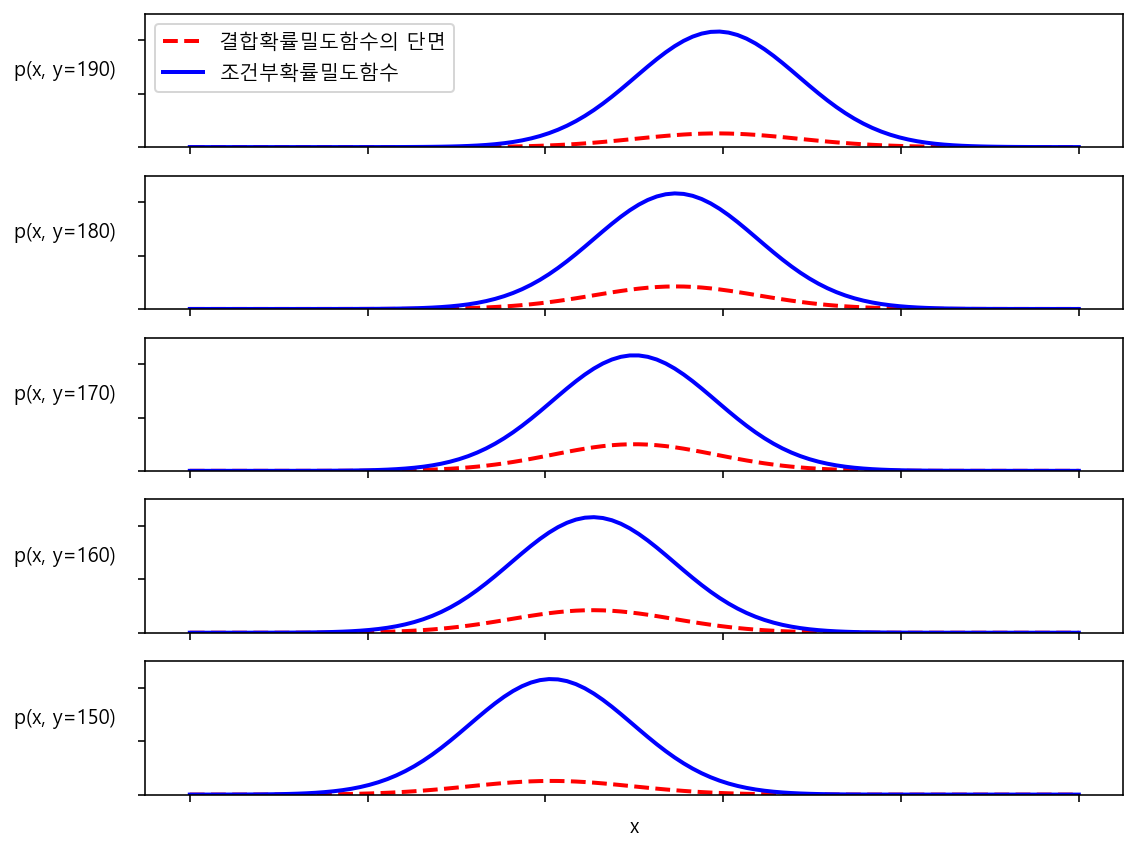

In [43]:
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

mag = 10 # 확대 비율
xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.figure(figsize=(8, 6))
for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :] * mag, 'r--', lw=2, label="결합확률밀도함수의 단면")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'b-', lw=2, label="조건부확률밀도함수")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
    if i == 0: 
        plt.legend(loc=2)
plt.xlabel("x")
plt.tight_layout()
plt.show()

## 독립과 상관